In [ ]:
# %cd f-threshold-select

In [ ]:
# !git clone https://github.com/fabian-sp/GGLasso.git

In [2]:
import gglasso
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import os
import matplotlib.pyplot as plt

from numpy import genfromtxt

from numpy.linalg import matrix_rank
from matplotlib.pyplot import figure
from scipy import stats
from scipy.linalg import eigh
from numpy import genfromtxt
from datetime import datetime

from gglasso.solver.admm_solver import ADMM_MGL
from gglasso.problem import glasso_problem

from gglasso.helper.data_generation import generate_precision_matrix, group_power_network, sample_covariance_matrix
from gglasso.helper.basic_linalg import adjacency_matrix
from gglasso.helper.data_generation import time_varying_power_network, sample_covariance_matrix
from gglasso.helper.experiment_helper import lambda_grid, discovery_rate, error
from gglasso.helper.utils import get_K_identity
from gglasso.helper.experiment_helper import plot_evolution, plot_deviation, surface_plot, single_heatmap_animation
from gglasso.helper.model_selection import aic, ebic, K_single_grid

### Read data

In [4]:
### on cloud
corr = []

for i in range(0, 950):
    corr.append(genfromtxt("/storage/groups/bds01/datasets/brains/corr_matrices/corr{0}.csv".format(i), delimiter=','))

    
corr = np.array(corr)
corr.shape

(950, 436, 436)

In [10]:
start = 0
stop = 50

sub_corr = []

### on premisis
for i in range(start, stop):
    sub_corr.append(genfromtxt("../../data/sub_corr50/sub_corr{0}.csv".format(i), delimiter=','))

    
sub_corr = np.array(sub_corr)
sub_corr.shape

(50, 436, 436)

### Single GL

### On premises

In [ ]:
N = [sub_corr.shape[1]]*sub_corr.shape[0]
lambda1_range = np.logspace(0, -3, 8)
print("Lambda range: {0}".format(lambda1_range))

est_uniform, est_indv, statistics = K_single_grid(sub_corr, lambda1_range, N, 
                                                  method = 'eBIC', gamma = 0.3, 
                                                  latent = False, use_block = True)


K = "50"

if not os.path.exists("../data/est_uniform{0}/".format(K)):
    os.mkdir("../data/est_uniform{0}/".format(K))
    
if not os.path.exists("../data/est_individ{0}/".format(K)):
    os.mkdir("../data/est_individ{0}/".format(K))

# dump matrices into csv
for i in range(start, stop):
    np.savetxt("../data/est_uniform{0}/est_uniform{1}.csv".format(K, i), est_uniform["Theta"][i], 
               delimiter=",", header='')
    np.savetxt("../data/est_individ{0}/est_individ{1}.csv".format(K, i), est_indv["Theta"][i], 
               delimiter=",", header='')
    
with open("../data/statistics{0}.txt".format(K), 'w') as f:
    print(statistics, file=f)

Lambda range: [1.         0.37275937 0.13894955 0.05179475 0.01930698 0.00719686
 0.0026827  0.001     ]
------------Range search for instance 0------------
ADMM terminated after 151 iterations with status: optimal.
ADMM terminated after 63 iterations with status: optimal.
ADMM terminated after 98 iterations with status: optimal.
ADMM terminated after 151 iterations with status: optimal.
ADMM terminated after 277 iterations with status: optimal.
ADMM terminated after 555 iterations with status: optimal.
ADMM terminated after 1000 iterations with status: primal optimal.
------------Range search for instance 1------------
ADMM terminated after 154 iterations with status: optimal.
ADMM terminated after 78 iterations with status: optimal.
ADMM terminated after 121 iterations with status: optimal.
ADMM terminated after 182 iterations with status: optimal.
ADMM terminated after 323 iterations with status: optimal.
ADMM terminated after 608 iterations with status: optimal.
ADMM terminated aft

### On cloud

In [6]:
lambda1_range = np.logspace(0, -3, 8)
lambda1_range

array([1.        , 0.37275937, 0.13894955, 0.05179475, 0.01930698,
       0.00719686, 0.0026827 , 0.001     ])

In [7]:
N = corr.shape[1]

In [ ]:
est_uniform, est_indv, statistics = K_single_grid(corr[:1, :], lambda1_range, N, 
                                                  method = 'eBIC', gamma = 0.3, 
                                                  latent = False, use_block = True)

In [ ]:
K = est_uniform["Theta"].shape[0]

In [ ]:
os.mkdir("/storage/groups/bds01/datasets/brains/est_uniform{0}/".format(K))
os.mkdir("/storage/groups/bds01/datasets/brains/est_individ{0}/".format(K))

In [ ]:
# dump matrices into csv
for i in range(0, K):
    np.savetxt("/storage/groups/bds01/datasets/brains/est_uniform{0}/est_uniform{1}.csv".format(K, i), est_uniform["Theta"][i], 
               delimiter=",", header='')
    np.savetxt("/storage/groups/bds01/datasets/brains/est_uniform{0}/est_individ{1}.csv".format(K, i), est_indv["Theta"][i], 
               delimiter=",", header='')

In [ ]:
# !jupyter nbconvert --to script --no-prompt SGL.ipynb

In [ ]:
with open("/storage/groups/bds01/datasets/brains/est_uniform50/statistics{0}.txt".format(K), 'w') as f:
    print(statistics, file=f)

In [ ]:
os.mkdir("/storage/groups/bds01/datasets/brains/est_uniform{0}/".format(K))

### Read solution

In [ ]:
corr = []
sol = []

for i in range(0, 300):
    corr.append(genfromtxt("/storage/groups/bds01/datasets/brains/corr_matrices/corr{0}.csv".format(i), delimiter=','))
    sol.append(genfromtxt("/storage/groups/bds01/datasets/brains/est_uniform0-300/est_uniform{0}.csv".format(i), delimiter=','))

In [ ]:
for i in range(300, 600):
    corr.append(genfromtxt("/storage/groups/bds01/datasets/brains/corr_matrices/corr{0}.csv".format(i), delimiter=','))
    sol.append(genfromtxt("/storage/groups/bds01/datasets/brains/est_uniform301-600/est_uniform{0}.csv".format(i), delimiter=','))

In [ ]:
for i in range(600, 951):
    corr.append(genfromtxt("/storage/groups/bds01/datasets/brains/corr_matrices/corr{0}.csv".format(i), delimiter=','))
    sol.append(genfromtxt("/storage/groups/bds01/datasets/brains/est_uniform600-951/est_uniform{0}.csv".format(i), delimiter=','))

In [2]:
corr = []
sol = []

for i in range(0, 951):
    corr.append(genfromtxt("/storage/groups/bds01/datasets/brains/corr_matrices/corr{0}.csv".format(i), delimiter=','))
    sol.append(genfromtxt("/storage/groups/bds01/datasets/brains/est_uniform/est_uniform{0}.csv".format(i), delimiter=','))

In [4]:
sol = np.array(sol)
corr = np.array(corr)
corr.shape, sol.shape

((951, 436, 436), (951, 436, 436))

### Plot the solution

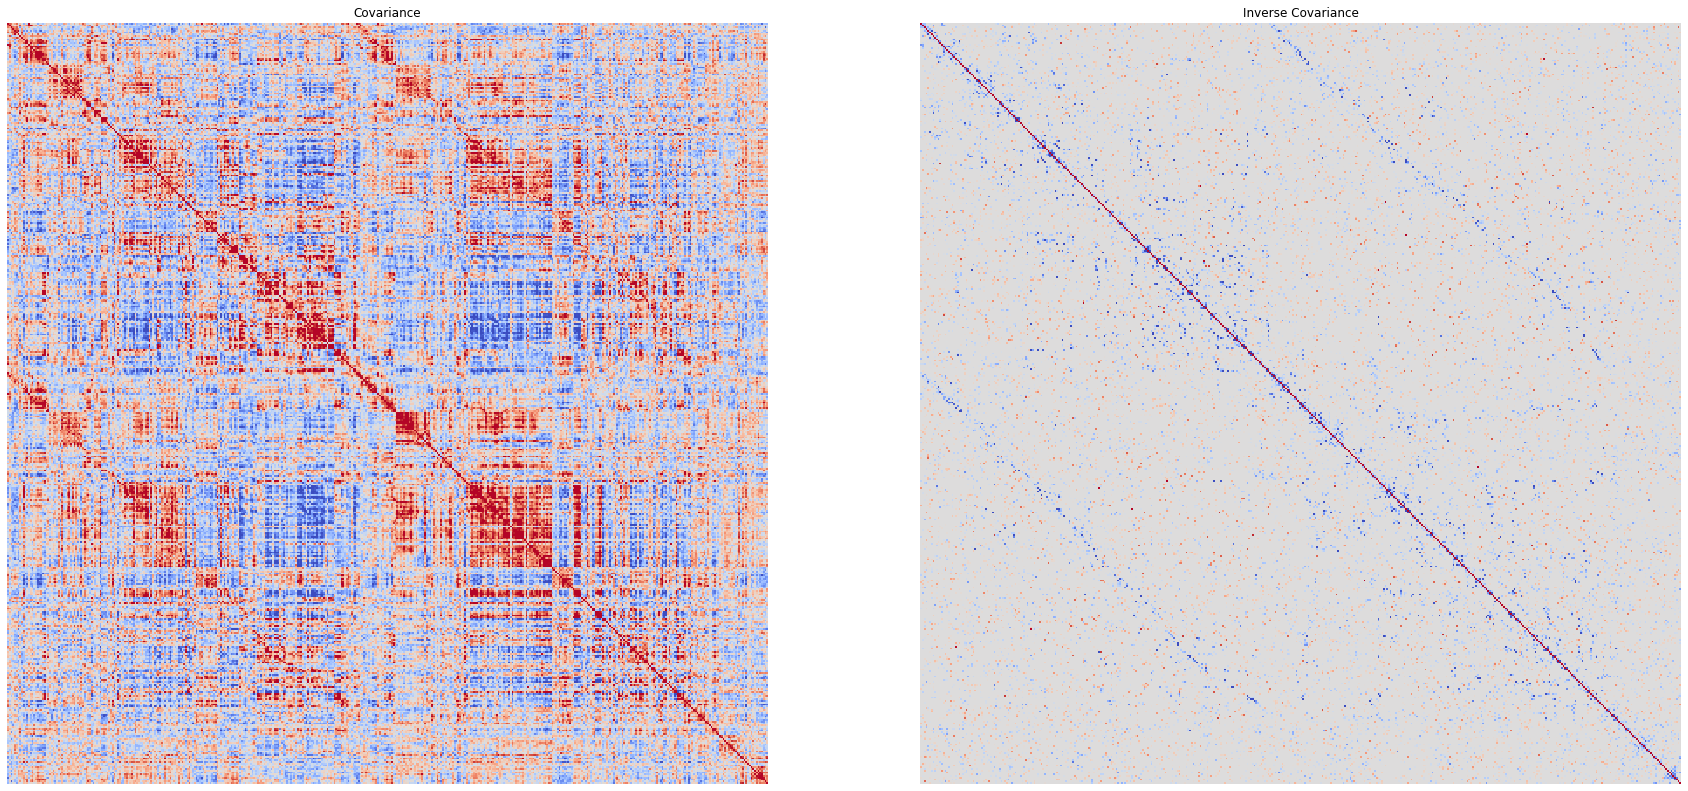

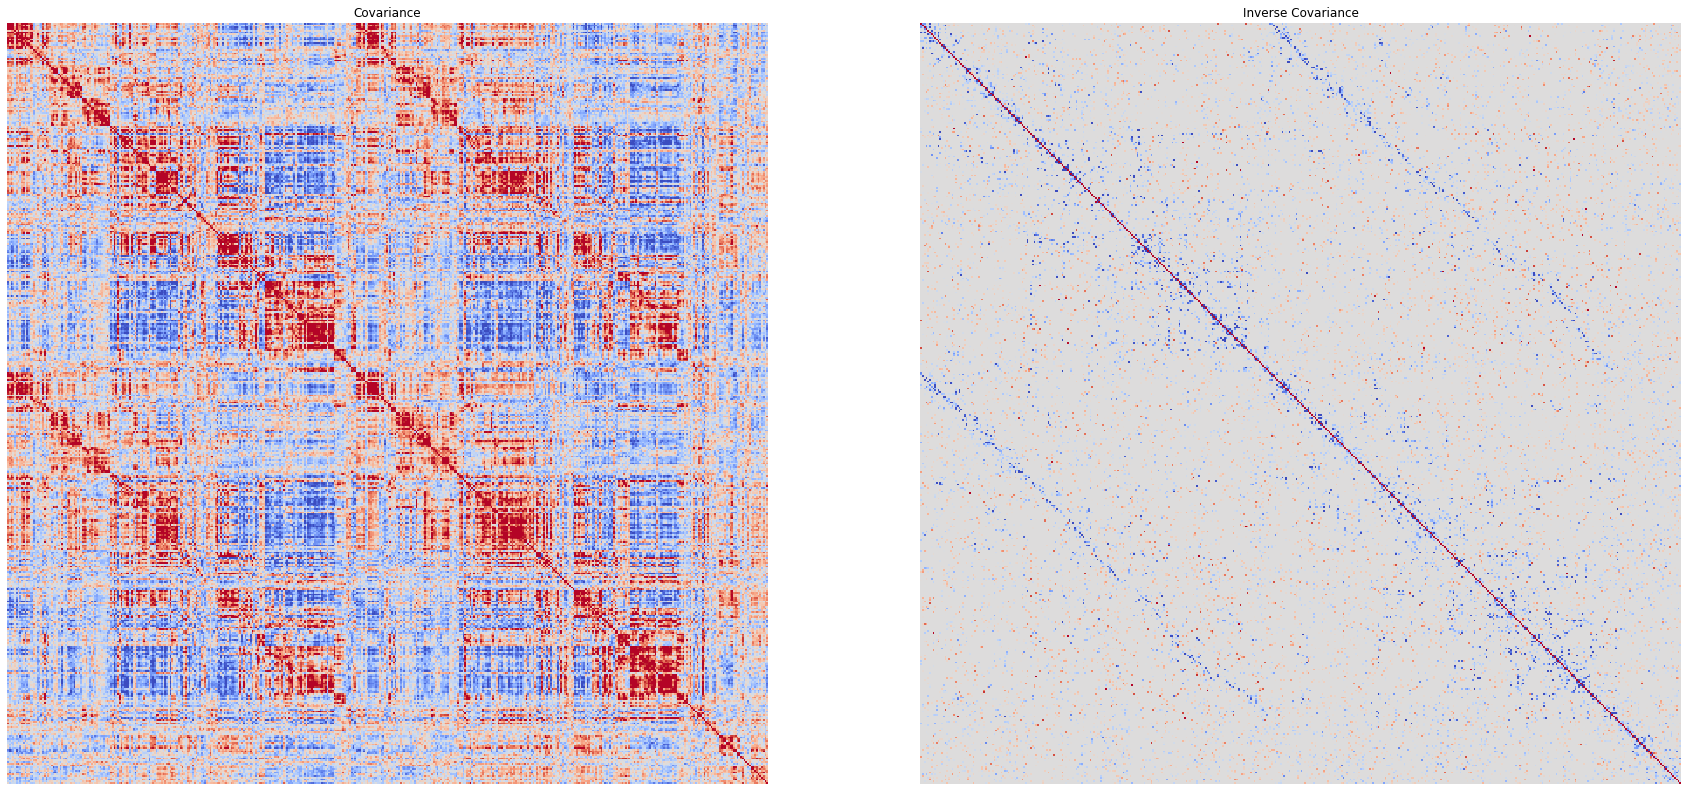

In [5]:
K = sol.shape[0]


for i in range(0, 2):
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(30,30))
    
    ax = sns.heatmap(corr[i, :], ax=axes[0], center=0, vmin = -0.5, vmax = 0.5, 
                     square = True, cbar = False, cmap = "coolwarm", xticklabels=False, yticklabels=False)
    ax.set_title('Covariance')
    
    ax = sns.heatmap(sol[i, :], ax=axes[1], center=0, vmin = -0.5, vmax = 0.5,
                     square = True, cbar = False, cmap = "coolwarm", xticklabels=False, yticklabels=False)
    ax.set_title('Inverse Covariance')
    
    fig.show()
    
    #fig.savefig("/storage/groups/bds01/datasets/brains/plots/SGL_plots/SGL_heatmap{0}.png".format(i))

In [2]:
sex = pd.read_csv("/storage/groups/bds01/datasets/brains/sex.csv")

In [9]:
print("The sex of {0} people - unknown (test set)".format(sex["sex_f0_m1"].isna().sum()))

The sex of 200 people - unknown (test set)


In [10]:
sex = sex.reset_index()

male_ixs = np.array(sex[sex["sex_f0_m1"] == 1.0]["index"])
female_ixs = np.array(sex[sex["sex_f0_m1"] == 0.0]["index"])

male_ixs.shape, female_ixs.shape

((412,), (339,))

In [14]:
def calculate_edge_probablity(data=list, indices=list):
    
    P = np.zeros((436, 436))
    
    for i in indices:
        x = data[i, :]
        x = (x != 0).astype(int)

        P = P + x
    
    P = P / len(indices)
    
    return pd.DataFrame(P)

In [13]:
P_male = calculate_edge_probablity(data=sol, indices=male_ixs)
P_female = calculate_edge_probablity(data=sol, indices=female_ixs)

NameError: name 'sol' is not defined

Set probability threshold = 0.8

In [ ]:
P_male[P_male < 0.8] = 0
P_female[P_female < 0.8] = 0

In [12]:
plt.figure(figsize=(16,16))
ax = sns.heatmap(P_male, center=0, vmin = -0.5, vmax = 0.5, square = True, cbar = False, 
                 cmap = "coolwarm", xticklabels=False, yticklabels=False)


fig, axes = plt.subplots(1, 2, sharex=True, figsize=(30,30))

ax = sns.heatmap(P_male, ax=axes[0], center=0, vmin = -0.5, vmax = 0.5, 
                 square = True, cbar = False, cmap = "coolwarm", xticklabels=False, yticklabels=False)
ax.set_title("Male's connectivity network")

ax = sns.heatmap(P_female, ax=axes[1], center=0, vmin = -0.5, vmax = 0.5,
                 square = True, cbar = False, cmap = "coolwarm", xticklabels=False, yticklabels=False)
ax.set_title("Female's connectivity network")

fig.show()

fig.savefig("/mnt/home/icb/oleg.vlasovetc/brain_challenge/f-threshold-select/plots/connectivity_heatmap.png")

,0,1,2,3,4,5,6,7,8,9,...,426,427,428,429,430,431,432,433,434,435
0,1.000000,0.862864,0.874563,0.887444,0.865420,0.860802,0.825420,0.831940,0.783429,0.832443,...,-0.706761,-0.679785,-0.757384,-0.720658,-0.770997,-0.721130,-0.740552,-0.690507,-0.775474,-0.479146
1,0.862864,1.000000,0.943930,0.960758,0.957155,0.967092,0.938049,0.963540,0.948906,0.951851,...,-0.743142,-0.694048,-0.830336,-0.774742,-0.770826,-0.763366,-0.767552,-0.736793,-0.849273,-0.680458
2,0.874563,0.943930,1.000000,0.974703,0.973595,0.964641,0.928262,0.931783,0.927953,0.958367,...,-0.733032,-0.718967,-0.781620,-0.787167,-0.787862,-0.771651,-0.763622,-0.711170,-0.808990,-0.613515
3,0.887444,0.960758,0.974703,1.000000,0.978658,0.971720,0.963888,0.947665,0.950740,0.952642,...,-0.772184,-0.758784,-0.827642,-0.804547,-0.814991,-0.795437,-0.797111,-0.760977,-0.848258,-0.633732
4,0.865420,0.957155,0.973595,0.978658,1.000000,0.978605,0.972867,0.957491,0.955258,0.974031,...,-0.774350,-0.758840,-0.813295,-0.808824,-0.811415,-0.794055,-0.797695,-0.753930,-0.840409,-0.626909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,-0.721130,-0.763366,-0.771651,-0.795437,-0.794055,-0.770796,-0.785644,-0.765095,-0.758391,-0.768294,...,0.908832,0.847037,0.909466,0.950743,0.916516,1.000000,0.941824,0.930798,0.820486,0.752399
432,-0.740552,-0.767552,-0.763622,-0.797111,-0.797695,-0.766373,-0.795223,-0.774781,-0.763456,-0.769146,...,0.908482,0.775842,0.929201,0.904363,0.929008,0.941824,1.000000,0.944460,0.843356,0.647362
433,-0.690507,-0.736793,-0.711170,-0.760977,-0.753930,-0.735560,-0.756725,-0.728365,-0.728869,-0.728294,...,0.921694,0.804361,0.913322,0.925533,0.912481,0.930798,0.944460,1.000000,0.861440,0.704453
434,-0.775474,-0.849273,-0.808990,-0.848258,-0.840409,-0.846529,-0.841594,-0.844294,-0.837913,-0.844942,...,0.859679,0.792381,0.903357,0.858328,0.887264,0.820486,0.843356,0.861440,1.000000,0.719620
